# Exploratory Data Analysis 

This is the code for the blog post [Exploratory Data Analysis](https://luminousmen.com/exploratory-data-analysis)

In [1]:
import pandas as pd
import plotly.offline as py 
import seaborn as sns
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 

The data is imported using the pandas predefined function `read_csv()` as our data file format is csv (comma-seprated values) in the dataset variable.

In [2]:
df = pd.read_csv("billionaires.csv")

## Basics

In [3]:
df.shape

(2614, 22)

In [4]:
df.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

The purpose of displaying examples from the data set is not to make a thorough analysis. It is to get a qualitative "sense" of the data we have.

In [5]:
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


Let's see if there are any missing data in the columns

In [6]:
df.isna().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

## Descriptive statistics

The descriptive statistics provide us a information of numerical featuers in the term of the Mean, Standard Deviation and 5 elements of the box plot (Min, Max, Q1, Q2, Q3).

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2614.0,5.996725e+02,4.678857e+02,1.0,215.0,430.0,9.880000e+02,1.565000e+03
year,2614.0,2.008412e+03,7.483598e+00,1996.0,2001.0,2014.0,2.014000e+03,2.014000e+03
company.founded,2614.0,1.924712e+03,2.437765e+02,0.0,1936.0,1963.0,1.985000e+03,2.012000e+03
demographics.age,2614.0,5.334124e+01,2.533332e+01,-42.0,47.0,59.0,7.000000e+01,9.800000e+01
location.gdp,2614.0,1.769103e+12,3.547083e+12,0.0,0.0,0.0,7.250000e+11,1.060000e+13
wealth.worth in billions,2614.0,3.531943e+00,5.088813e+00,1.0,1.4,2.0,3.500000e+00,7.600000e+01


## Plot quantitative data

Often a quick histogram is enough to understand the data.

Let's start with the main thing - *what's about money*.

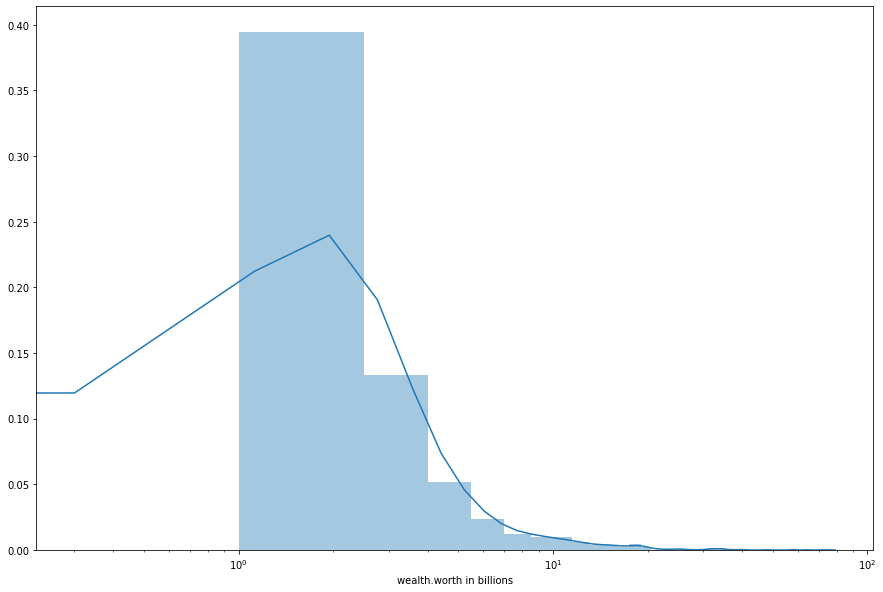

In [8]:
plt.figure(figsize=(15,10))
sns.distplot(df['wealth.worth in billions'])
plt.xscale('log')

I used a logarithmic scale to at least show some distribution. Obviously, there are many more people who don't have huge amounts of money but there is also a long tail that indicates that there are people who have VERY much money.

*How old are our billionaires?*

We remember that there are outliers in this column, let's clean them up and see the right picture.

In [9]:
df = df[df['demographics.age'] > 0]

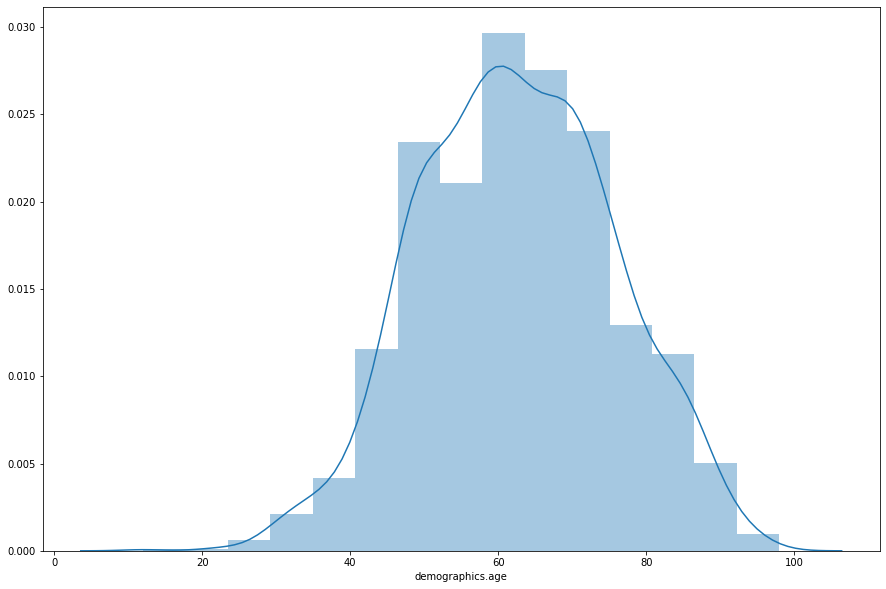

In [10]:
plt.figure(figsize=(15,10))
sns.distplot(df['demographics.age'], bins=15)
plt.show()

The distribution is similar to normal, with a slightly larger tail on the left. 

Let's do the same with the splitting by industry.

<Figure size 1080x720 with 0 Axes>

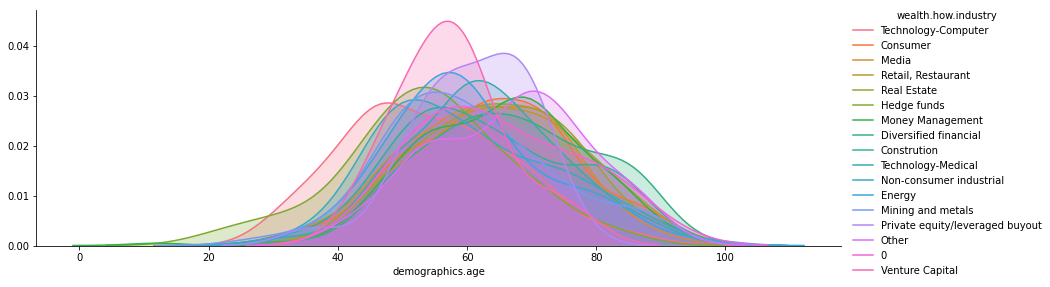

In [11]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=df, hue='wealth.how.industry', aspect=3, height=4)
g.map(sns.kdeplot, 'demographics.age', shade=True)
g.add_legend(title='wealth.how.industry')

<Figure size 1080x720 with 0 Axes>

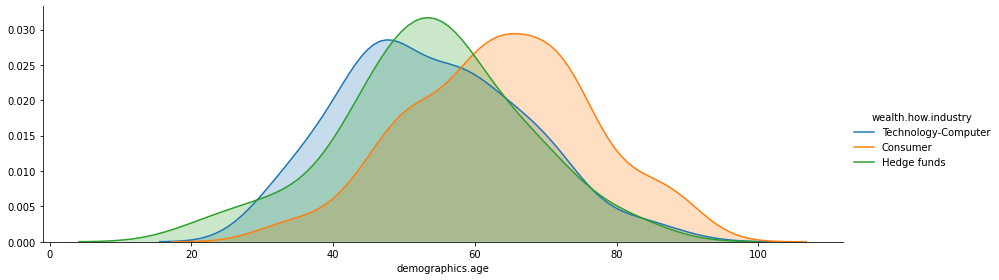

In [12]:
industries = ['Hedge funds', 'Consumer', 'Technology-Computer']
plt.figure(figsize=(15,10))
g = sns.FacetGrid(
    data=df[(df['wealth.how.industry'] != '0') & (df['wealth.how.industry'].isin(industries))], 
    hue='wealth.how.industry', 
    aspect=3, 
    height=4)
g.map(sns.kdeplot, 'demographics.age', shade=True)
g.add_legend(title='wealth.how.industry')

You can see the money going to the older part on the dataset. In addition, it can be seen that tech companies are more skewed towards the young, while the consumer industry is the opposite towards the elderly. There is also an industry where for some reason one can get rich before 20.

## Plot qualitative data

Let's answer the question — *what industry are the richer billionaires in?*

Text(0.5, 1.0, 'Industries of billioners')

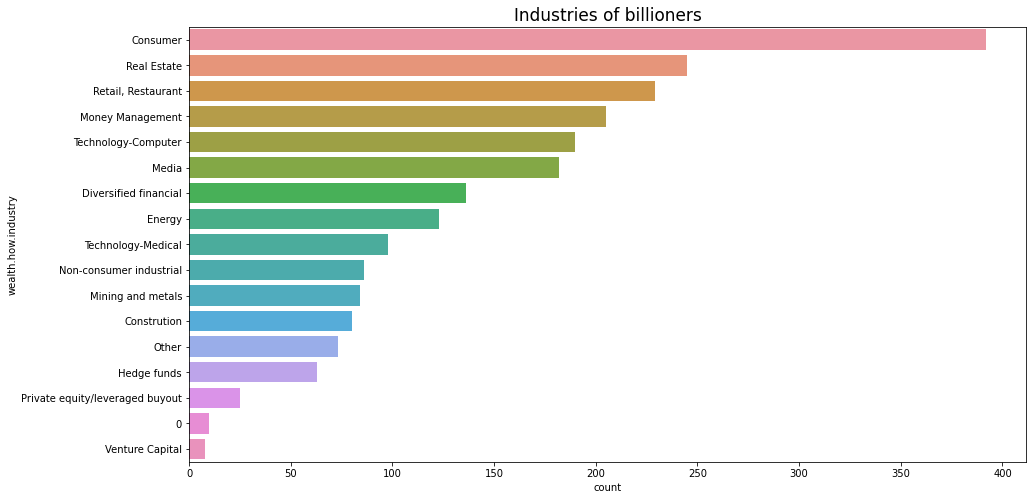

In [13]:
city = df['wealth.how.industry'].value_counts(ascending=False)

df_city = df.filter(['wealth.how.industry'], axis=1)
df_city['count'] = 1

grouped_city = df_city.groupby('wealth.how.industry', as_index=False,sort=False).sum()
grouped_city.sort_index(ascending=False)

grouped_city = grouped_city.sort_values('count', ascending=False)                            

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_city, x='count', y='wealth.how.industry')
plt.title('Industries of billioners', fontsize=17)

Judging by the plot at the top are industries that target consumers.  It is difficult for me to draw any conclusions as to why - but it is this insight that I can tell the business. Besides, there is some industry 0 - we can assume that these are people who simply don't have industry or it's mixed.

Who are the more men or women among the billionaires?

Text(0.5, 1.0, 'Gender')

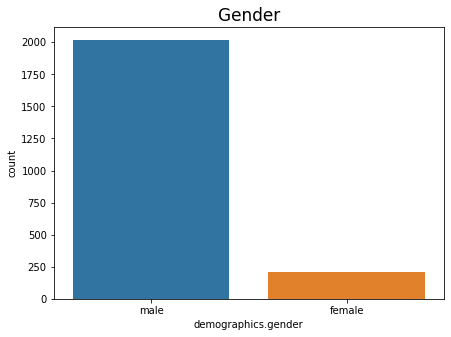

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='demographics.gender')
plt.title('Gender', fontsize=17)

It just so happens that it's mostly men.

*Let's try to see the billionaire countries.*

In [15]:
column = 'location.citizenship'
fig  = go.Figure(data = [
    go.Pie(
        values = df[column].value_counts().values.tolist(),
        labels = df[column].value_counts().keys().tolist(),
        name = column,
        marker = dict(line = dict(width = 2, color = 'rgb(243,243,243)')),
    hole = .3
    )],
    layout=dict(title = dict(text="Billionaire countries"))

)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

More than a third of billionaires come from the United States.

## Boxplots

Let's go through all the quantitative data and build their box plots.

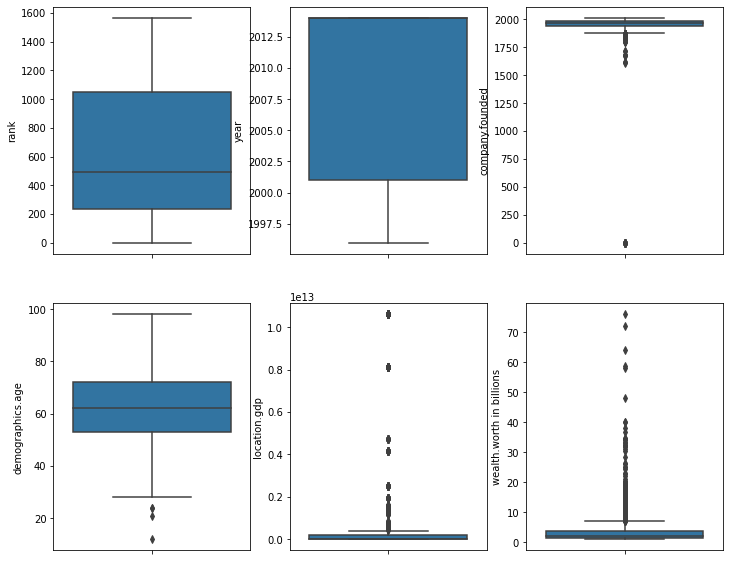

In [16]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
for (index, col) in enumerate(df.select_dtypes(include=['int','float']).columns):
    sns.boxplot(data=df, y=col, ax=axes[index//3][index%3])

`rank` — it appears to show a human rank in the overall sample.

`year`. We can see the period of time during which the billionaires are collected. You can see that he's been very skewed to recent years, which seems logical - if you could earn the first billion a long time ago, then in time you should probably stack more and you're unlikely to leave this list.

`company.founded`. A similar conclusion, you can also see that there are likely to be some missing values. We'll have to deal with them later.

`demographics.age`. A lot of outliers, you can see that there are people with zero or negative age, which is not right. If you throw away such outliers, you may suspect that there is something near-normal in this variable distribution. We should build a distplot for this variable.

`location.gdp`. It is difficult to say something on this graph - it seems that most billionaire countries are not very rich, but it is difficult to judge what this column means exactly.

`wealth.worth in billions`. A huge number of outliers, although by quarters we can say that most have close to zero number of billions that we have already seen in the previous plots.

In the simplest box plot, the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). As a rule, outliers are either 3×IQR below the third quartile or 3×IQR above the first quartile. But the definition of the outlier will be different for each data set.

Boxplot is very good at presenting information about the central tendency, symmetry and variance, although they can mislead aspects such as multimodality. One of the best applications of boxplot is in the form of side-by-side boxplot (see multivariate graphical analysis below).

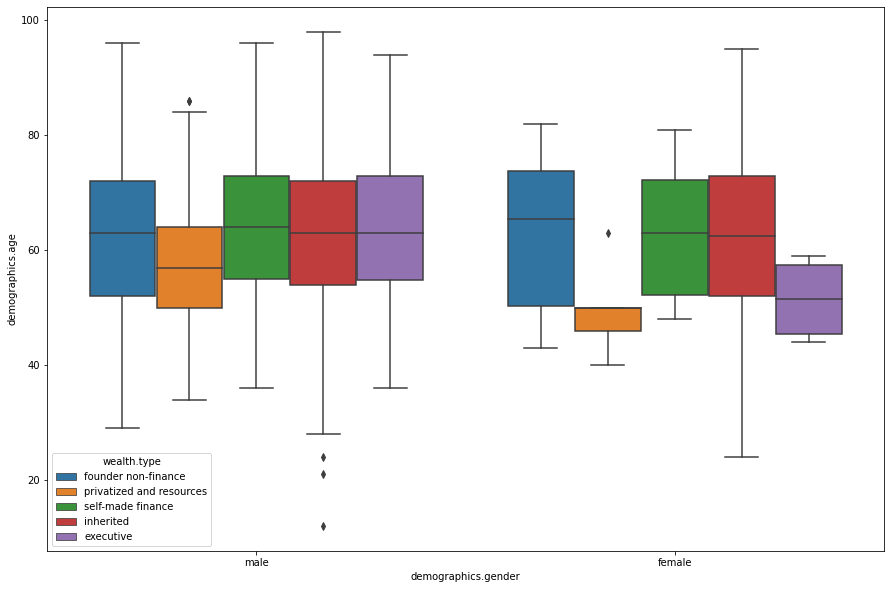

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='demographics.gender', y="demographics.age", hue="wealth.type", data=df)
plt.show()

## Correlation analysis

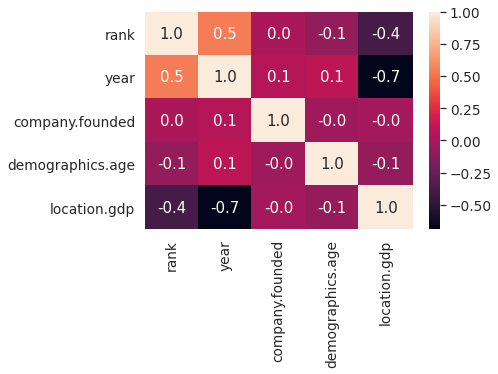

In [18]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(
    df[['rank', 'year', 'company.founded', 'demographics.age', 'location.gdp']].corr(), 
    annot = True,
    fmt = '.1f'
)
plt.show()

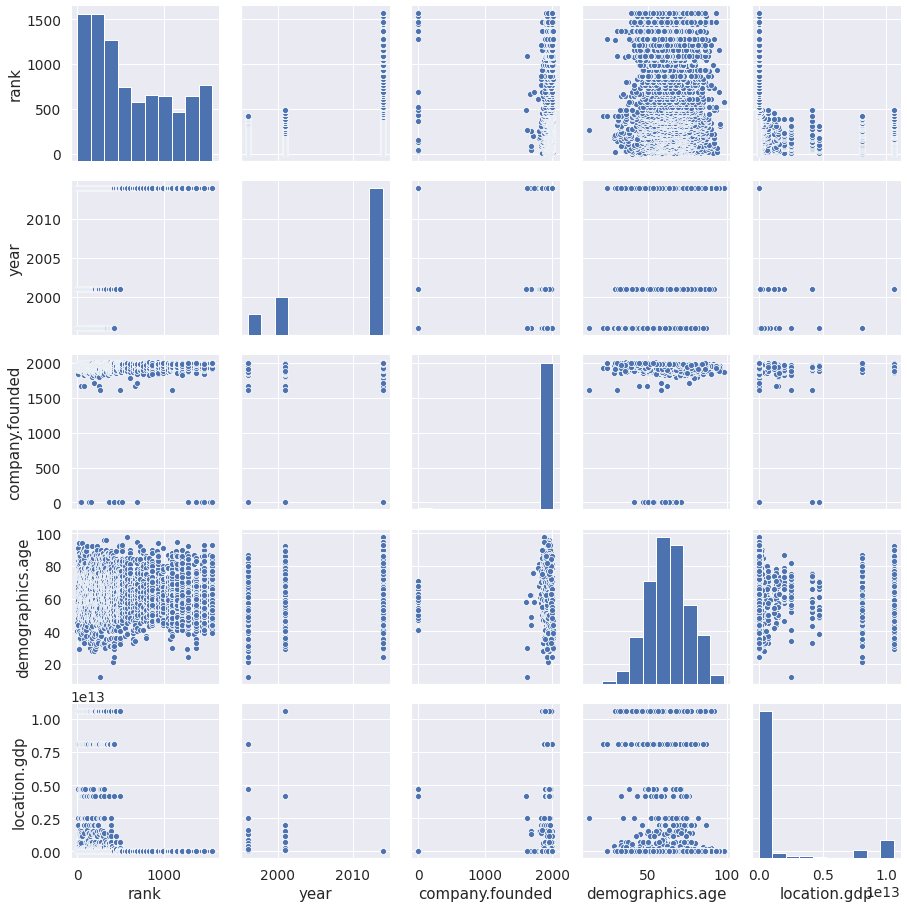

In [19]:
cols = ['rank', 'year', 'company.founded', 'demographics.age', 'location.gdp']
sns.pairplot(
    data=df[cols], 
    vars=cols, 
    kind='scatter'
)

## Industries of billioners

In [20]:
times = df['name'].value_counts().rename_axis('name').reset_index(name='times')

In [21]:
top_rich = pd.merge(df, times, on='name')
top_rich = top_rich[top_rich['year'] == 2014]
top_rich = top_rich.nlargest(200, 'wealth.worth in billions')
top_rich.shape

(200, 23)

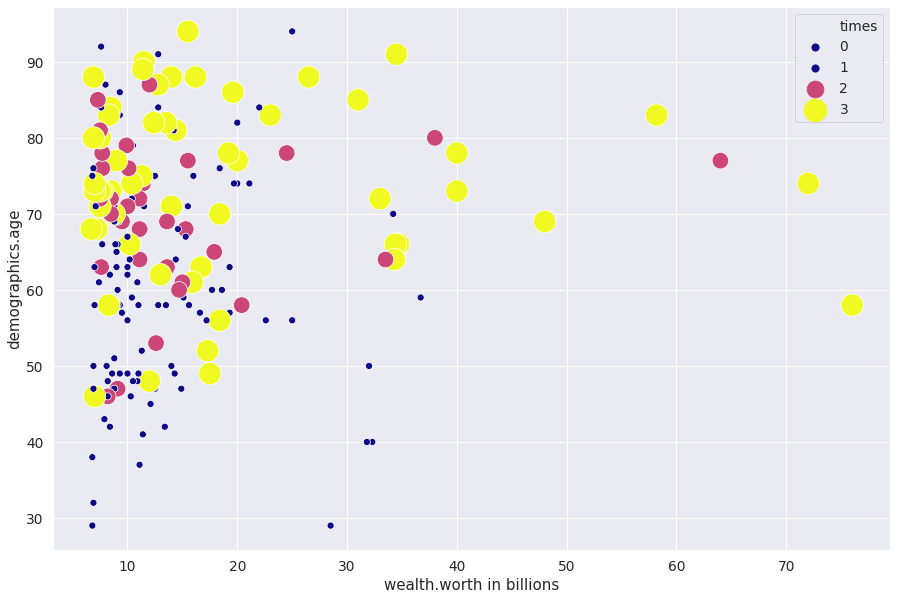

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x='wealth.worth in billions', 
    y='demographics.age', 
    hue='times', 
    size='times', 
    data=top_rich, 
    palette='plasma',
    sizes=(50, 500)
)
plt.show()